# Analyse jlogs!

In [1]:
import numpy as np
import networkx as nx
import json
import glob
import matplotlib.pyplot as plt
from pprint import pprint
from collections import Counter

## Find all the files in the jlog directory

In [2]:
jlogs = glob.glob('jlogs/*')

## Retrieve all data from runs using the MEMB method

In [3]:
memb = []
for jlog in jlogs:
    with open(jlog, 'r') as f:
        data = json.load(f)
        for line in data['run']['args']:
            if 'method' in line:
                method = line.split('=')[1]
                if method == "memb":
                    memb.append(data)

## Calculate the fractal dimension for each PPIN

In [4]:
num_boxes = [[m['graph_info'][0]['vertices']] + m['size'] for m in memb]
num_edges = [m['graph_info'][0]['edges'] for m in memb]
organism = [m['graph_info'][0]['graph'].split('/')[-1].split('-')[2] for m in memb]

length = [[2 * r + 1 for r in [0] + m['radius']] for m in memb]    

fractal_dimension = [-np.polyfit(np.log(l), np.log(b), 1)[0] for l, b in zip(length, num_boxes)]

## Plot fractal dimension

In [5]:
with open("frac_graph_steep.txt", "r") as f:
    data = f.read().splitlines()
    
steep = list(set(organism).intersection(set(data)))

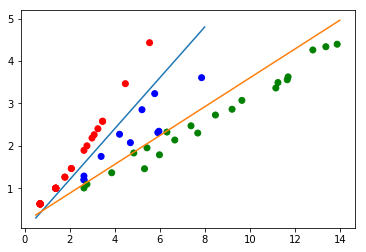

In [6]:
# fig = plt.figure(figsize=(30, 30), dpi=300)
fig = plt.figure()
ax = fig.add_subplot(111)

# ====================================== #

l_x = np.linspace(start=0.5, stop=8, num=10)
m1, c1 = 0.6, 0
l_y = [m1 * i + c1 for i in l_x]
plt.plot(l_x, l_y)

# ====================================== #

l_x = np.linspace(start=0.5, stop=14, num=10)
m2, c2 = 0.34, 0.2
l_y = [m2 * i + c2 for i in l_x]
plt.plot(l_x, l_y)

# ====================================== #

x = np.log(num_edges)
y = fractal_dimension

colour = []
steep = []
shallow = []
others = []

for index, (px, py) in enumerate(zip(x, y)):
    if py > m1 * px + c1:
        colour.append('red')
        steep.append(organism[index])
    elif py < m2 * px + c2:
        colour.append('green')
        shallow.append(organism[index])
    else:
        colour.append('blue')
        others.append(organism[index])

ax.scatter(x, y, c=colour)
# y = np.linspace(start=0.5, stop=4.5, num=10)

# ax.set_xscale('log')
# ax.scatter(range(len(fractal_dimension)), fractal_dimension)

# for label, x, y in zip(organism, num_edges, fractal_dimension):
#     if label not in data:
#         plt.annotate(
#             label,
#             xy=(x, y), xytext=(-20, 20),
#             textcoords='offset points', ha='right', va='bottom',
#             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#             arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [7]:
steep

['Vitis_vinifera',
 'Solanum_tuberosum',
 'Pediculus_humanus',
 'Pan_troglodytes',
 'Ovis_aries',
 'Nicotiana_tomentosiformis',
 'Meleagris_gallopavo',
 'Human_papillomavirus_10',
 'Human_Herpesvirus_7',
 'Human_Herpesvirus_3',
 'Escherichia_coli_K12',
 'Equus_caballus',
 'Bacillus_subtilis_168',
 'Apis_mellifera',
 'Anopheles_gambiae_PEST',
 'Zea_mays',
 'Vaccinia_Virus',
 'Tobacco_Mosaic_Virus',
 'Ricinus_communis',
 'Human_Herpesvirus_6B',
 'Human_Herpesvirus_2',
 'Chlorocebus_sabaeus',
 'Cavia_porcellus',
 'Ustilago_maydis_521',
 'Human_Herpesvirus_6A',
 'Simian_Virus_40',
 'Dictyostelium_discoideum_AX4',
 'Neurospora_crassa_OR74A',
 'Mycobacterium_tuberculosis_H37Rv',
 'Macaca_mulatta',
 'Glycine_max',
 'Chlamydomonas_reinhardtii',
 'Strongylocentrotus_purpuratus',
 'Human_papillomavirus_6b',
 'Emericella_nidulans_FGSC_A4',
 'Hepatitus_C_Virus']

In [8]:
shallow

['Escherichia_coli_K12_MC4100_BW2952',
 'Selaginella_moellendorffii',
 'Sus_scrofa',
 'Solanum_lycopersicum',
 'Bos_taurus',
 'Danio_rerio',
 'Oryctolagus_cuniculus',
 'Gallus_gallus',
 'Human_Herpesvirus_8',
 'Candida_albicans_SC5314',
 'Xenopus_laevis',
 'Plasmodium_falciparum_3D7',
 'Rattus_norvegicus',
 'Caenorhabditis_elegans',
 'Arabidopsis_thaliana_Columbia',
 'Mus_musculus',
 'Schizosaccharomyces_pombe_972h',
 'Drosophila_melanogaster',
 'Escherichia_coli_K12_W3110',
 'Homo_sapiens',
 'Saccharomyces_cerevisiae_S288c']

In [9]:
others

['Simian_Immunodeficiency_Virus',
 'Human_Immunodeficiency_Virus_2',
 'Canis_familiaris',
 'Cricetulus_griseus',
 'Human_Herpesvirus_5',
 'Oryza_sativa_Japonica',
 'Escherichia_coli_K12_MG1655',
 'Human_papillomavirus_16',
 'Human_Herpesvirus_4',
 'Human_Herpesvirus_1',
 'Human_Immunodeficiency_Virus_1']